# <center>Network Science</center>

## <center/>Course Project #2

### <center>Student: *Ivanitskiy Ilya*</center>

#### <hr /> General Information

## Description

### Data

As a dataset to analyse you can choose one option in the following list:
1. Real Dataset (can be found [here](http://snap.stanford.edu/) or [here](http://konect.uni-koblenz.de/networks/))
2. Generated Dataset. Use more complex structure rather than just a simple ER model. For instance, you may consider multilevel network, where on the lower level you have several Watts-Strogatz graphs and on the upper level these graphs are respesented as randomly connected nodes.
3. Your data mined from Social Networks, Twitter, LiveJournal e.t.c.

**The order of your dataset should be no less than $10^4$ nodes**

In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle as pkl
%matplotlib inline
from tqdm import tqdm

In [3]:
def save(object_name, file_name):
    f = open(file_name,'wb')
    pkl.dump(object_name, f)
    f.close()

In [4]:
def any_statistics(G):
    cc = nx.connected_components(G)
    j = 0
    cc_size = []
    for i in cc:
        j = j + 1
        cc_size.append(len(i))
    print('count CC: %d' % j)
    print('max size CC: %d' % max(cc_size))
    print('Edges: %d' % len(G.edges()))
    print('Nodes: %d' % len(G.nodes()))
    print('Density: %f' % nx.density(G))
    degrees = pd.Series(G.degree())
    plt.figure(figsize=[14,6])
    plt.subplot(121)
    plt.plot(np.log(degrees.value_counts().index),(degrees.value_counts().values))
    plt.xlabel('LOG Node degree')
    plt.ylabel('Count of nodes')
    plt.subplot(122)
    plt.plot((degrees.value_counts().index),(degrees.value_counts().values))
    plt.xlabel('Node degree')
    plt.ylabel('Count of nodes')

count CC: 1
max size CC: 19995
Edges: 287405
Nodes: 19995
Density: 0.001438


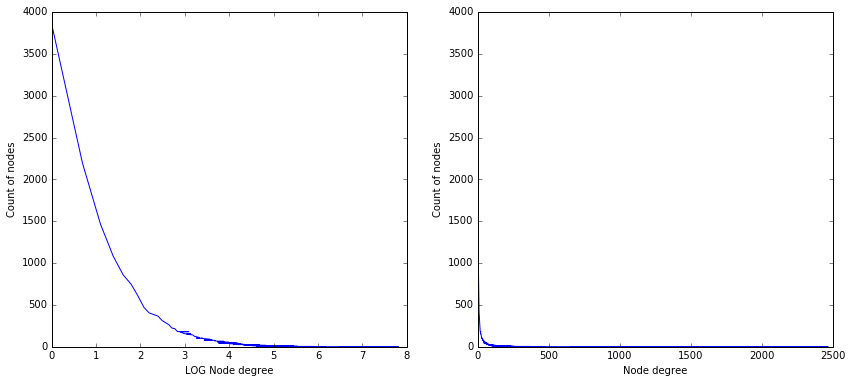

In [5]:
min_ = 0
max_ = 20000
graph_df = pd.read_csv('soc-Epinions1.txt',sep = '\t')
edges_ = list(map(lambda x,y: (x,y), graph_df.FromNodeId, graph_df.ToNodeId))
edges = {(i,j) for i,j in edges_ if (i<=max_) and (j<=max_) and (i>=min_) and (j>=min_)}
G_density = nx.Graph()
G_density.add_edges_from(edges)
any_statistics(G_density)

count CC: 585
max size CC: 7807
Edges: 19644
Nodes: 9217
Density: 0.000463


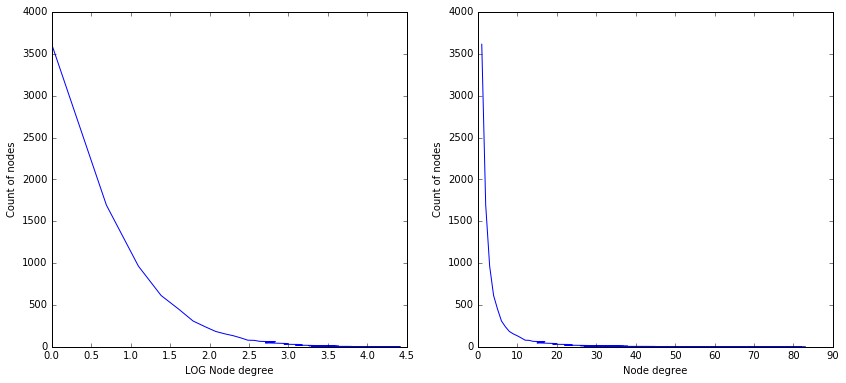

In [6]:
min_ = 10000
max_ = 30000
graph_df = pd.read_csv('soc-Epinions1.txt',sep = '\t')
edges_ = list(map(lambda x,y: (x,y), graph_df.FromNodeId, graph_df.ToNodeId))
edges = {(i,j) for i,j in edges_ if (i<=max_) and (j<=max_) and (i>=min_) and (j>=min_)}
G_undensity = nx.Graph()
G_undensity.add_edges_from(edges)
any_statistics(G_undensity)

In [275]:
it = 9
layout = nx.layout.spring_layout(G_density,iterations=it,k = 4/10000.)
save(layout, 'layout_spring_'+str(it))

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=[30,30])
#nx.draw(G_density, pos = layout)
nx.draw(G_density, pos = layout)

### Models

Consider one of the following models:
1. SIR-based (or another with more than 3 letters) epidemic model
2. Independent Cascade Model
3. Linear Threshold Model

### Tasks

#### Network Descriptive Analysis

Provide information on your netowork: Source, Descriptive Statistics, Visualization

#### Main Task for model (1)

You are in charge of leading the vaccination campaign against some outbroken nonlethal disease. You have options to vactinate or provide medical treatment to infected ones. However, everything has its costs:
* Vaccination of a node costs $500 \$$ and make it immune to the disease all life-long. Unfortunately, you can help this way only to no more than $10\%$ of your population
* Medical Treatment costs $120\$$ per day of illness period, which in turn may take from $3$ to $7$ days

Your task is to implement the simulation model, propose some vaccination strategies and compare them.

#### Main Task for models (2-3)

You are running the marketing campaign for brand new pocket device. Initially you can sign contracts with a few people to advertize your gadget among their neigbours. The more "famous" person you are picking the greater price appears in the contract.
* Contract cost can be calculated as $300 \$ \times \text{NN}(i)$, where $\text{NN}(i)$ is size of the neigbourhood of the person $i$.
* You earn $250\$$ per each affected person

Your task is to maximize your influence and maximize profit of your campaign

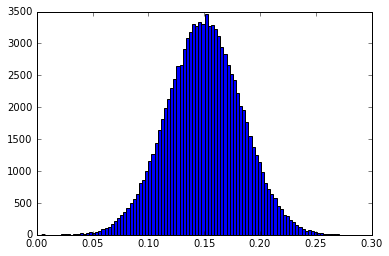

In [7]:
a = plt.hist([max([0,(np.random.normal())/30+0.15]) for i in range(1,100000)],bins= 100)

In [8]:
print(0)
pgrnk = nx.pagerank(G_density)
print(1)
print(2)
dc = nx.degree_centrality(G_density)
print(4)

0
1
2
4


In [9]:
NODES = {'pgrnk': pgrnk,
         'dc':dc}

In [10]:
from functools import reduce

In [13]:
def counting_p(node_infected,candidate, G, degrees, neighbors):
    p = degrees[node_infected]/sum(list(map(lambda x: degrees[x], neighbors[candidate])))
    return p

def ICM(G,NODES = NODES, cost_of_contract = 300, cost_of_affected = 250, n_init = 200, how_we_take_first = 'random'):
    # how_we_take_first:
    #        'random'
    #        'pgrnk'
    #        'dc'
    #        'cc'
    #        'degree'
    
    # n_init - count of nodes in begin of plague
    
    if how_we_take_first == 'random':
        nodes = G.nodes()
        np.random.shuffle(nodes)
        nodes_infected = nodes[:n_init]
    elif how_we_take_first == 'pgrnk':
        pr = NODES['pgrnk']
        nodes = sorted(pr, key=pr.get)
        nodes.reverse()
        nodes_infected = nodes[:n_init]
    elif how_we_take_first == 'degree':
        degree = NODES['degree']
        nodes = sorted(degrees, key=degrees.get)
        nodes.reverse()
        nodes_infected = nodes[:n_init]
    elif how_we_take_first =='cc':
        degree = NODES['cc']
        nodes = sorted(degrees, key=degrees.get)
        nodes.reverse()
        nodes_infected = nodes[:n_init]
    elif how_we_take_first == 'dc':
        degree = NODES['dc']
        nodes = sorted(degrees, key=degrees.get)
        nodes.reverse()
        nodes_infected = nodes[:n_init]
    nodes_death = []
    cost_of_contracts = cost_of_contract * sum(list(map(lambda x: len(G.neighbors(x)), nodes_infected)))
    # I - Infected
    # N - NotInfected
    # D - Death
    affected_person = 0
    income = [-cost_of_contracts]
    k = 0
    neighbors = {i:G.neighbors(i) for i in G.nodes()}
    degrees = G.degree()
    while len(nodes_infected) != 0:
        k = k + 1
        new_nodes_infected = []
        # кого можно инфицировать на данной стадии
        candidates = list(map(lambda x: 
                        list(map(lambda y: 
                            (x,y), list(set(G.neighbors(x)).difference(set(nodes_death)).difference(set(nodes_infected)))))
                        , nodes_infected))
        candidates = reduce(lambda res,x: x+res,candidates)
        
        realization_ps = [np.random.uniform() for i in range(len(candidates))]
        ps = [counting_p(i,j,G,degrees, neighbors) for i,j in candidates]
        who_will_be_next = pd.Series(realization_ps) <= pd.Series(ps)
        next_step = pd.Series(candidates)[who_will_be_next]
        new_nodes_infected = [j for i,j in next_step]
        affected_person = affected_person + sum(who_will_be_next)
        
        nodes_death = nodes_death + nodes_infected
        nodes_death = list(set(nodes_death))
        nodes_infected = list(set(new_nodes_infected.copy()))
        
        plt.clf()
        income.append(affected_person * cost_of_affected - cost_of_contracts)
        plt.plot(income)
        plt.savefig(str(k)+'.jpg')
    return affected_person * cost_of_affected - cost_of_contracts

[18]


732200

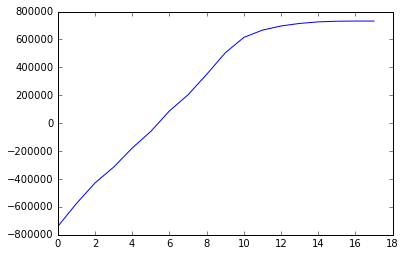

In [18]:
ICM(G_density, n_init = 1,how_we_take_first='pgrnk')

In [335]:
d = {}
for i in tqdm(range(1,201,10)):
    res = []
    for j in range(10):
        res.append(ICM(n_init=i))
    d.update([(i,res.copy())])

  0%|                                                   | 0/20 [00:00<?, ?it/s]

TypeError: ICM() missing 1 required positional argument: 'G'

In [208]:
[np.mean(d[j]) for j in d]

[17485.0,
 -214795.0,
 -232790.0,
 -27160.0,
 -372795.0,
 -137245.0,
 -32395.0,
 -177390.0,
 -29490.0,
 -325215.0,
 -152905.0,
 -139660.0,
 -132020.0,
 -94480.0,
 11230.0,
 -238295.0,
 -157130.0,
 -86290.0,
 23335.0,
 -66180.0]

  4%|█▊                                         | 1/24 [01:13<28:07, 73.39s/it]

[18]
[18, 645]

  8%|███▌                                       | 2/24 [02:06<24:38, 67.20s/it]


[18, 645, 763]

 12%|█████▍                                     | 3/24 [03:37<26:02, 74.42s/it]


[18, 645, 763, 634]

 17%|███████▏                                   | 4/24 [04:31<22:44, 68.24s/it]


[18, 645, 763, 634, 143]

 21%|████████▉                                  | 5/24 [05:47<22:21, 70.60s/it]


[18, 645, 763, 634, 143, 737, 44, 1179, 136, 27]

 25%|██████████▊                                | 6/24 [07:11<22:23, 74.62s/it]


[18, 645, 763, 634, 143, 737, 44, 1179, 136, 27, 751, 790, 118, 637, 1]

 29%|████████████▌                              | 7/24 [08:46<22:54, 80.87s/it]


[18, 645, 763, 634, 143, 737, 44, 1179, 136, 27, 751, 790, 118, 637, 1, 1719, 34, 780, 791, 1299]

 33%|██████████████▎                            | 8/24 [10:29<23:17, 87.35s/it]


[18, 645, 763, 634, 143, 737, 44, 1179, 136, 27, 751, 790, 118, 637, 1, 1719, 34, 780, 791, 1299, 1516, 128, 4416, 40, 401]

 38%|████████████████▏                          | 9/24 [12:04<22:26, 89.77s/it]


[18, 645, 763, 634, 143, 737, 44, 1179, 136, 27, 751, 790, 118, 637, 1, 1719, 34, 780, 791, 1299, 1516, 128, 4416, 40, 401, 145, 77, 1440, 725, 0]

 42%|█████████████████▌                        | 10/24 [13:51<22:08, 94.91s/it]


[18, 645, 763, 634, 143, 737, 44, 1179, 136, 27, 751, 790, 118, 637, 1, 1719, 34, 780, 791, 1299, 1516, 128, 4416, 40, 401, 145, 77, 1440, 725, 0, 390, 849, 28, 125, 824]

 46%|███████████████████▎                      | 11/24 [15:22<20:19, 93.83s/it]


[18, 645, 763, 634, 143, 737, 44, 1179, 136, 27, 751, 790, 118, 637, 1, 1719, 34, 780, 791, 1299, 1516, 128, 4416, 40, 401, 145, 77, 1440, 725, 0, 390, 849, 28, 125, 824, 3924, 1619, 1029, 550, 726]

 50%|█████████████████████                     | 12/24 [17:12<19:42, 98.53s/it]


[18, 645, 763, 634, 143, 737, 44, 1179, 136, 27, 751, 790, 118, 637, 1, 1719, 34, 780, 791, 1299, 1516, 128, 4416, 40, 401, 145, 77, 1440, 725, 0, 390, 849, 28, 125, 824, 3924, 1619, 1029, 550, 726, 135, 1059, 738, 31, 418]

 54%|██████████████████████▊                   | 13/24 [18:47<17:51, 97.40s/it]


[18, 645, 763, 634, 143, 737, 44, 1179, 136, 27, 751, 790, 118, 637, 1, 1719, 34, 780, 791, 1299, 1516, 128, 4416, 40, 401, 145, 77, 1440, 725, 0, 390, 849, 28, 125, 824, 3924, 1619, 1029, 550, 726, 135, 1059, 738, 31, 418, 590, 735, 650, 2512, 1621]

 58%|████████████████████████▌                 | 14/24 [20:19<15:57, 95.76s/it]


[18, 645, 763, 634, 143, 737, 44, 1179, 136, 27, 751, 790, 118, 637, 1, 1719, 34, 780, 791, 1299, 1516, 128, 4416, 40, 401, 145, 77, 1440, 725, 0, 390, 849, 28, 125, 824, 3924, 1619, 1029, 550, 726, 135, 1059, 738, 31, 418, 590, 735, 650, 2512, 1621, 74, 49, 776, 1191, 492, 35, 1401, 443, 918, 1398, 385, 295, 1396, 629, 2239]

 62%|█████████████████████████▋               | 15/24 [22:16<15:20, 102.29s/it]


[18, 645, 763, 634, 143, 737, 44, 1179, 136, 27, 751, 790, 118, 637, 1, 1719, 34, 780, 791, 1299, 1516, 128, 4416, 40, 401, 145, 77, 1440, 725, 0, 390, 849, 28, 125, 824, 3924, 1619, 1029, 550, 726, 135, 1059, 738, 31, 418, 590, 735, 650, 2512, 1621, 74, 49, 776, 1191, 492, 35, 1401, 443, 918, 1398, 385, 295, 1396, 629, 2239, 770, 438, 46, 1596, 549, 90, 837, 64, 663, 395, 699, 1225, 1075, 119, 563]

 67%|███████████████████████████▎             | 16/24 [24:00<13:43, 102.90s/it]


[18, 645, 763, 634, 143, 737, 44, 1179, 136, 27, 751, 790, 118, 637, 1, 1719, 34, 780, 791, 1299, 1516, 128, 4416, 40, 401, 145, 77, 1440, 725, 0, 390, 849, 28, 125, 824, 3924, 1619, 1029, 550, 726, 135, 1059, 738, 31, 418, 590, 735, 650, 2512, 1621, 74, 49, 776, 1191, 492, 35, 1401, 443, 918, 1398, 385, 295, 1396, 629, 2239, 770, 438, 46, 1596, 549, 90, 837, 64, 663, 395, 699, 1225, 1075, 119, 563, 12, 616, 4415, 661, 1753, 1178, 449, 374, 1164, 733, 59, 854, 1623, 307, 30]

 71%|█████████████████████████████▊            | 17/24 [24:36<09:38, 82.70s/it]


[18, 645, 763, 634, 143, 737, 44, 1179, 136, 27, 751, 790, 118, 637, 1, 1719, 34, 780, 791, 1299, 1516, 128, 4416, 40, 401, 145, 77, 1440, 725, 0, 390, 849, 28, 125, 824, 3924, 1619, 1029, 550, 726, 135, 1059, 738, 31, 418, 590, 735, 650, 2512, 1621, 74, 49, 776, 1191, 492, 35, 1401, 443, 918, 1398, 385, 295, 1396, 629, 2239, 770, 438, 46, 1596, 549, 90, 837, 64, 663, 395, 699, 1225, 1075, 119, 563, 12, 616, 4415, 661, 1753, 1178, 449, 374, 1164, 733, 59, 854, 1623, 307, 30, 141, 19, 103, 433, 717, 715, 4969, 66, 138, 388, 1756, 2120, 1189, 5232, 1432]

 75%|███████████████████████████████▌          | 18/24 [25:06<06:41, 66.89s/it]


[18, 645, 763, 634, 143, 737, 44, 1179, 136, 27, 751, 790, 118, 637, 1, 1719, 34, 780, 791, 1299, 1516, 128, 4416, 40, 401, 145, 77, 1440, 725, 0, 390, 849, 28, 125, 824, 3924, 1619, 1029, 550, 726, 135, 1059, 738, 31, 418, 590, 735, 650, 2512, 1621, 74, 49, 776, 1191, 492, 35, 1401, 443, 918, 1398, 385, 295, 1396, 629, 2239, 770, 438, 46, 1596, 549, 90, 837, 64, 663, 395, 699, 1225, 1075, 119, 563, 12, 616, 4415, 661, 1753, 1178, 449, 374, 1164, 733, 59, 854, 1623, 307, 30, 141, 19, 103, 433, 717, 715, 4969, 66, 138, 388, 1756, 2120, 1189, 5232, 1432, 576, 883, 766, 1247, 1399, 586, 1437, 329, 81, 1209, 3850, 102, 301, 600, 682]

 79%|█████████████████████████████████▎        | 19/24 [26:16<05:39, 67.88s/it]


[18, 645, 763, 634, 143, 737, 44, 1179, 136, 27, 751, 790, 118, 637, 1, 1719, 34, 780, 791, 1299, 1516, 128, 4416, 40, 401, 145, 77, 1440, 725, 0, 390, 849, 28, 125, 824, 3924, 1619, 1029, 550, 726, 135, 1059, 738, 31, 418, 590, 735, 650, 2512, 1621, 74, 49, 776, 1191, 492, 35, 1401, 443, 918, 1398, 385, 295, 1396, 629, 2239, 770, 438, 46, 1596, 549, 90, 837, 64, 663, 395, 699, 1225, 1075, 119, 563, 12, 616, 4415, 661, 1753, 1178, 449, 374, 1164, 733, 59, 854, 1623, 307, 30, 141, 19, 103, 433, 717, 715, 4969, 66, 138, 388, 1756, 2120, 1189, 5232, 1432, 576, 883, 766, 1247, 1399, 586, 1437, 329, 81, 1209, 3850, 102, 301, 600, 682, 1190, 2704, 696, 210, 104, 639, 130, 546, 195, 1909, 1172, 398, 83, 652, 85]

 83%|███████████████████████████████████       | 20/24 [27:58<05:12, 78.18s/it]


[18, 645, 763, 634, 143, 737, 44, 1179, 136, 27, 751, 790, 118, 637, 1, 1719, 34, 780, 791, 1299, 1516, 128, 4416, 40, 401, 145, 77, 1440, 725, 0, 390, 849, 28, 125, 824, 3924, 1619, 1029, 550, 726, 135, 1059, 738, 31, 418, 590, 735, 650, 2512, 1621, 74, 49, 776, 1191, 492, 35, 1401, 443, 918, 1398, 385, 295, 1396, 629, 2239, 770, 438, 46, 1596, 549, 90, 837, 64, 663, 395, 699, 1225, 1075, 119, 563, 12, 616, 4415, 661, 1753, 1178, 449, 374, 1164, 733, 59, 854, 1623, 307, 30, 141, 19, 103, 433, 717, 715, 4969, 66, 138, 388, 1756, 2120, 1189, 5232, 1432, 576, 883, 766, 1247, 1399, 586, 1437, 329, 81, 1209, 3850, 102, 301, 600, 682, 1190, 2704, 696, 210, 104, 639, 130, 546, 195, 1909, 1172, 398, 83, 652, 85, 107, 446, 1014, 681, 169, 79, 127, 555, 279, 607, 843, 112, 1429, 1620, 722]

 88%|████████████████████████████████████▊     | 21/24 [29:55<04:29, 89.69s/it]


[18, 645, 763, 634, 143, 737, 44, 1179, 136, 27, 751, 790, 118, 637, 1, 1719, 34, 780, 791, 1299, 1516, 128, 4416, 40, 401, 145, 77, 1440, 725, 0, 390, 849, 28, 125, 824, 3924, 1619, 1029, 550, 726, 135, 1059, 738, 31, 418, 590, 735, 650, 2512, 1621, 74, 49, 776, 1191, 492, 35, 1401, 443, 918, 1398, 385, 295, 1396, 629, 2239, 770, 438, 46, 1596, 549, 90, 837, 64, 663, 395, 699, 1225, 1075, 119, 563, 12, 616, 4415, 661, 1753, 1178, 449, 374, 1164, 733, 59, 854, 1623, 307, 30, 141, 19, 103, 433, 717, 715, 4969, 66, 138, 388, 1756, 2120, 1189, 5232, 1432, 576, 883, 766, 1247, 1399, 586, 1437, 329, 81, 1209, 3850, 102, 301, 600, 682, 1190, 2704, 696, 210, 104, 639, 130, 546, 195, 1909, 1172, 398, 83, 652, 85, 107, 446, 1014, 681, 169, 79, 127, 555, 279, 607, 843, 112, 1429, 1620, 722, 556, 1617, 65, 1606, 1669, 67, 551, 850, 723, 684, 1283, 22, 1173, 879, 786]

 92%|██████████████████████████████████████▌   | 22/24 [31:35<03:05, 92.77s/it]


[18, 645, 763, 634, 143, 737, 44, 1179, 136, 27, 751, 790, 118, 637, 1, 1719, 34, 780, 791, 1299, 1516, 128, 4416, 40, 401, 145, 77, 1440, 725, 0, 390, 849, 28, 125, 824, 3924, 1619, 1029, 550, 726, 135, 1059, 738, 31, 418, 590, 735, 650, 2512, 1621, 74, 49, 776, 1191, 492, 35, 1401, 443, 918, 1398, 385, 295, 1396, 629, 2239, 770, 438, 46, 1596, 549, 90, 837, 64, 663, 395, 699, 1225, 1075, 119, 563, 12, 616, 4415, 661, 1753, 1178, 449, 374, 1164, 733, 59, 854, 1623, 307, 30, 141, 19, 103, 433, 717, 715, 4969, 66, 138, 388, 1756, 2120, 1189, 5232, 1432, 576, 883, 766, 1247, 1399, 586, 1437, 329, 81, 1209, 3850, 102, 301, 600, 682, 1190, 2704, 696, 210, 104, 639, 130, 546, 195, 1909, 1172, 398, 83, 652, 85, 107, 446, 1014, 681, 169, 79, 127, 555, 279, 607, 843, 112, 1429, 1620, 722, 556, 1617, 65, 1606, 1669, 67, 551, 850, 723, 684, 1283, 22, 1173, 879, 786, 1016, 1441, 1274, 447, 997, 48, 29, 1024, 431, 1405, 2144, 13, 1749, 664, 72]


KeyboardInterrupt: 

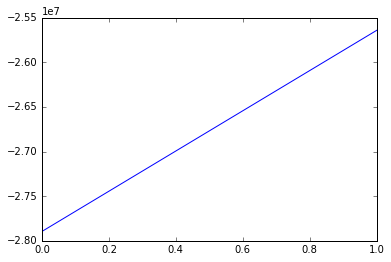

In [19]:
d = {}
for i in tqdm(list(['pgrnk' ,'dc'])):
    dd = {}
    for j in tqdm(list(range(1,5)) + list(range(5,50,5)) + list(range(50,201,15))):
        res = ICM(G_density,NODES = NODES, n_init = j, how_we_take_first = i)
        dd.update([(j,res)])
    d.update([(i,dd.copy())])